In [1]:
# Q1
'''
Using Kaggle's oceanic dataset (you will need a Kaggle account to download this):

Try several linear models to predict water temperature as a function of other variables

Examine the variables, their correlations with each other, and their contribution to the final model. 
Train a new linear regression with fewer variables and report how much predictive power your models retain as you shrink the number of variables to 10 or fewer.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read CSV file into a pandas DataFrame
bottle = pd.read_csv(r"C:\Users\yq89_\Desktop/bottle.csv")
bottle

C:\Users\yq89_\AppData\Local\Temp\ipykernel_46272\1570106342.py:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle = pd.read_csv(r"C:\Users\yq89_\Desktop/bottle.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [5]:
# Drop the index column
bottle.reset_index(drop=True, inplace=True)

In [6]:
# Read Percentage of Null Value
nul = bottle.isnull().sum() / len(bottle)
nul = nul[nul>0]
nul = nul.sort_values(ascending = False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(nul)

pH2                    0.999988
DIC Quality Comment    0.999936
pH1                    0.999903
DIC2                   0.999741
TA2                    0.999729
DIC1                   0.997689
TA1                    0.997590
C14A2p                 0.985267
C14A1p                 0.985246
C14As2                 0.983334
C14As1                 0.983313
IncTim                 0.983307
LightP                 0.978435
MeanAp                 0.976347
DarkAp                 0.976347
DarkAs                 0.973812
MeanAs                 0.973811
T_qual                 0.973259
NH3uM                  0.924888
R_NH4                  0.924864
SThtaq                 0.923892
S_qual                 0.913381
BtlNum                 0.862791
R_SAMP                 0.858930
O_qual                 0.786468
O2Satq                 0.748172
Phaeop                 0.739530
ChlorA                 0.739529
R_PHAEO                0.739525
R_CHLA                 0.739524
NO3uM                  0.609877
R_NO3   

In [7]:
'''
As I examine the dataset, I observe that certain columns contain more than 50% missing values. 
In light of this, it would be prudent to remove these columns from the analysis. 
Therefore, I will focus solely on the columns where the percentage of missing values is less than 50%.
'''
nul = nul[nul<=0.5]
col = nul.index.values
col

array(['PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'Chlqua', 'Phaqua',
       'Oxy_µmol/Kg', 'O2Sat', 'R_O2Sat', 'P_qual', 'R_O2', 'O2ml_L',
       'NH3q', 'R_SIGMA', 'R_SVA', 'STheta', 'R_SALINITY', 'S_prec',
       'Salnty', 'R_DYNHT', 'R_POTEMP', 'MeanAq', 'DarkAq', 'C14A1q',
       'C14A2q', 'T_prec', 'R_TEMP', 'T_degC'], dtype=object)

In [8]:
bottle.shape

(864863, 74)

In [9]:
bottle = bottle[col]
bottle.shape

(864863, 28)

In [10]:
bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PO4q         451786 non-null  float64
 1   SiO3qu       510866 non-null  float64
 2   NO2q         529474 non-null  float64
 3   NO3q         529933 non-null  float64
 4   Chlqua       639166 non-null  float64
 5   Phaqua       639170 non-null  float64
 6   Oxy_µmol/Kg  661268 non-null  float64
 7   O2Sat        661274 non-null  float64
 8   R_O2Sat      666448 non-null  float64
 9   P_qual       673755 non-null  float64
 10  R_O2         696201 non-null  float64
 11  O2ml_L       696201 non-null  float64
 12  NH3q         808299 non-null  float64
 13  R_SIGMA      812007 non-null  float64
 14  R_SVA        812092 non-null  float64
 15  STheta       812174 non-null  float64
 16  R_SALINITY   817509 non-null  float64
 17  S_prec       817509 non-null  float64
 18  Salnty       817509 non-

In [11]:
# Imputing the missing values with mean
nul = bottle.isnull().sum() / len(bottle)
nul = nul[nul>0]
nul = nul.sort_values(ascending = False)
nulcol = nul.index.values
for col in nulcol:
    bottle.loc[:, col] = bottle[col].fillna(bottle[col].mean())

C:\Users\yq89_\AppData\Local\Temp\ipykernel_46272\3523290862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottle.loc[:, col] = bottle[col].fillna(bottle[col].mean())
C:\Users\yq89_\AppData\Local\Temp\ipykernel_46272\3523290862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottle.loc[:, col] = bottle[col].fillna(bottle[col].mean())
C:\Users\yq89_\AppData\Local\Temp\ipykernel_46272\3523290862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

C:\Users\yq89_\AppData\Local\Temp\ipykernel_46272\3523290862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottle.loc[:, col] = bottle[col].fillna(bottle[col].mean())
C:\Users\yq89_\AppData\Local\Temp\ipykernel_46272\3523290862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottle.loc[:, col] = bottle[col].fillna(bottle[col].mean())
C:\Users\yq89_\AppData\Local\Temp\ipykernel_46272\3523290862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [12]:
# Check whether null value still exists
nul = bottle.isnull().sum() / len(bottle)
nul = nul[nul>0]
nul = nul.sort_values(ascending = False)
nul

Series([], dtype: float64)

In [13]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = bottle.drop("T_degC" ,axis =1)
y = bottle["T_degC"]

X_train,X_test,y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [15]:
# Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = linreg.predict(X_test)
y_pred

array([10.25000523,  3.76000878,  5.26998266, ...,  9.68998895,
        9.2399813 ,  5.56997508])

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.pyplot import scatter
from matplotlib.pyplot import hist

In [18]:
model_tracker= pd.DataFrame({"model":[], "rmse":[], "r2":[]})

def evaluate_model(model_name, y_test, y_pred):
    mse= mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)

    residuals = y_test- y_pred

    payload = [model_name, rmse, r2]
    model_tracker.loc[len(model_tracker.index)] = payload
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6))


    axes[0].scatter(y_pred, residuals,s=0.1)
    axes[1].hist(residuals[residuals<=150000], bins =30)
    plt.show()
    return model_tracker

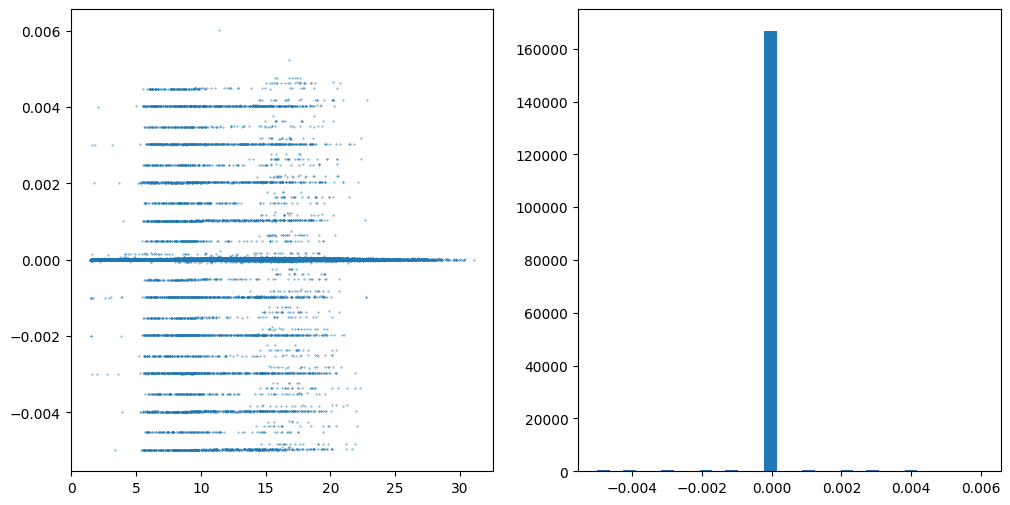

,model,rmse,r2
0,linear-1,0.000575,1.0


In [19]:
evaluate_model("linear-1",  y_test, y_pred)

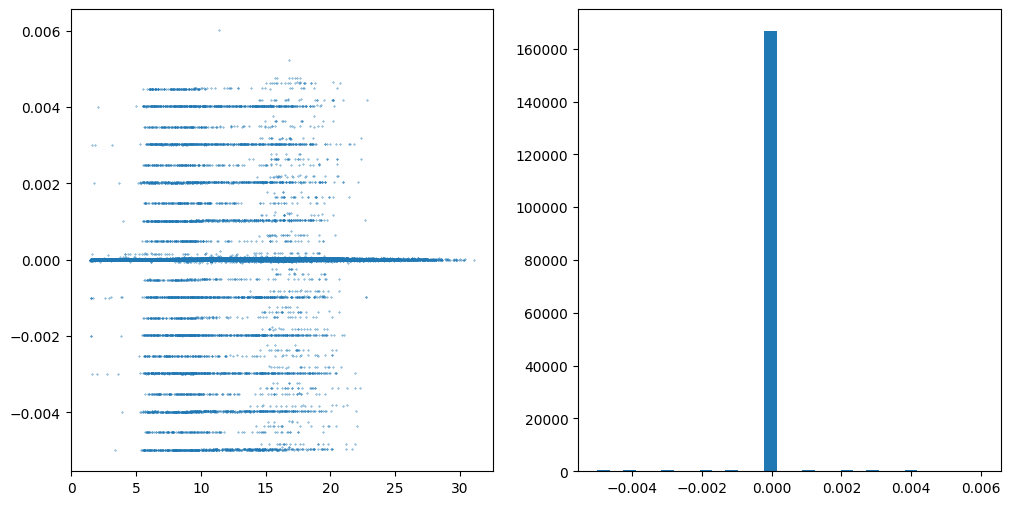

,model,rmse,r2
0,linear-1,0.000575,1.0
1,ridge-1,0.000575,1.0


In [20]:
# Ridge model
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.1)
ridge_model = ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
evaluate_model("ridge-1",  y_test, y_pred)

In [21]:
# Using GridSearchCV to determine the best value for alpha
from sklearn.model_selection import GridSearchCV

ridge_grid = Ridge()
param_grid = {"alpha":[0.01,0.1,1,10,100]}
grid_search = GridSearchCV(ridge_grid, param_grid, cv=5) #5 is default for cv, bu we can also do cv like alpha
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

In [22]:
grid_search.best_params_

{'alpha': 1}

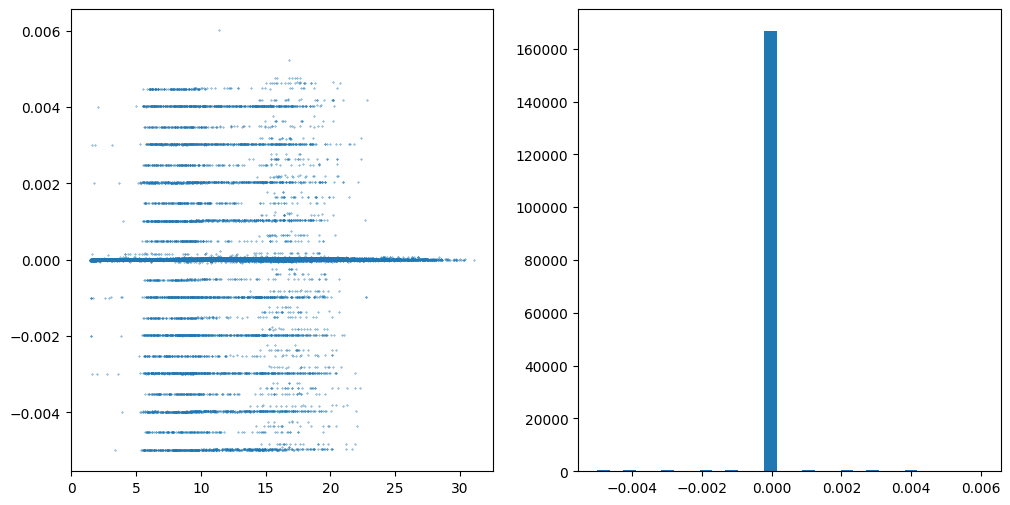

,model,rmse,r2
0,linear-1,0.000575,1.0
1,ridge-1,0.000575,1.0
2,ridge-grid-1,0.000575,1.0


In [23]:
evaluate_model("ridge-grid-1",  y_test, y_pred)

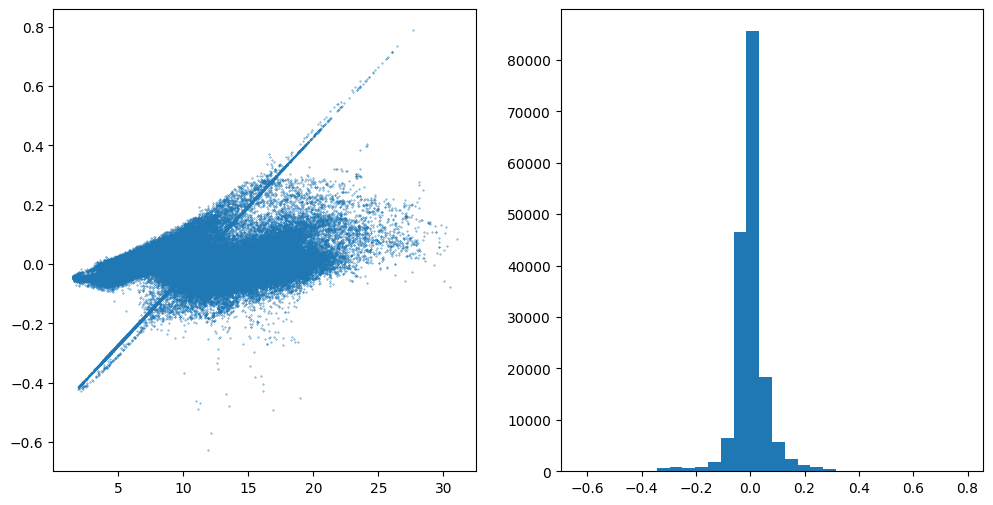

,model,rmse,r2
0,linear-1,0.000575,1.000000
1,ridge-1,0.000575,1.000000
2,ridge-grid-1,0.000575,1.000000
3,lasso-1,0.064654,0.999764


In [24]:
# Lasso model
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 0.1)
lasso_model = lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
evaluate_model("lasso-1",  y_test, y_pred)

In [25]:
# Using GridSearchCV to determine the best value for alpha
lasso_grid = Lasso()
param_grid = {"alpha":[0.01,0.1,1,10,100]}
grid_search = GridSearchCV(lasso_grid, param_grid, cv=5) #5 is default for cv, bu we can also do cv like alpha
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

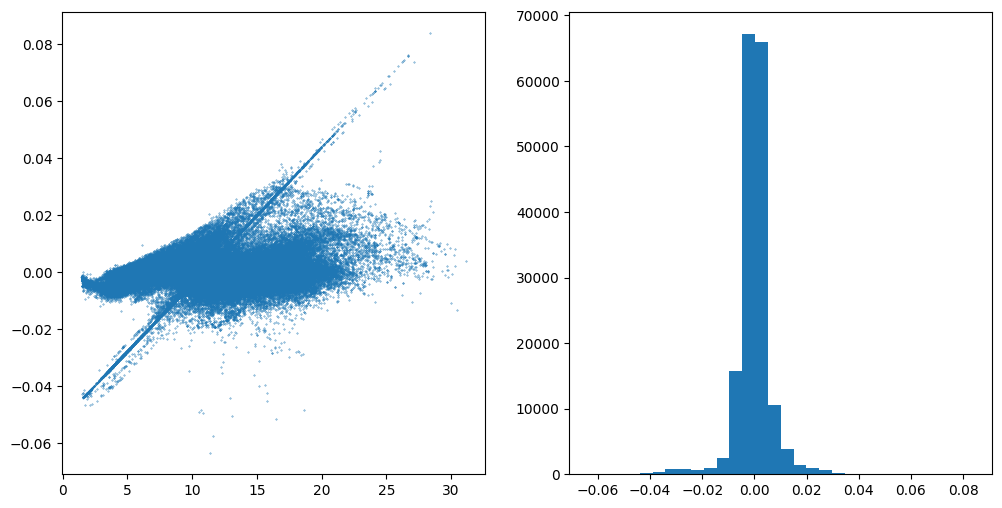

,model,rmse,r2
0,linear-1,0.000575,1.000000
1,ridge-1,0.000575,1.000000
2,ridge-grid-1,0.000575,1.000000
3,lasso-1,0.064654,0.999764
4,lasso-grid-1,0.006712,0.999997


In [26]:
evaluate_model("lasso-grid-1",  y_test, y_pred)

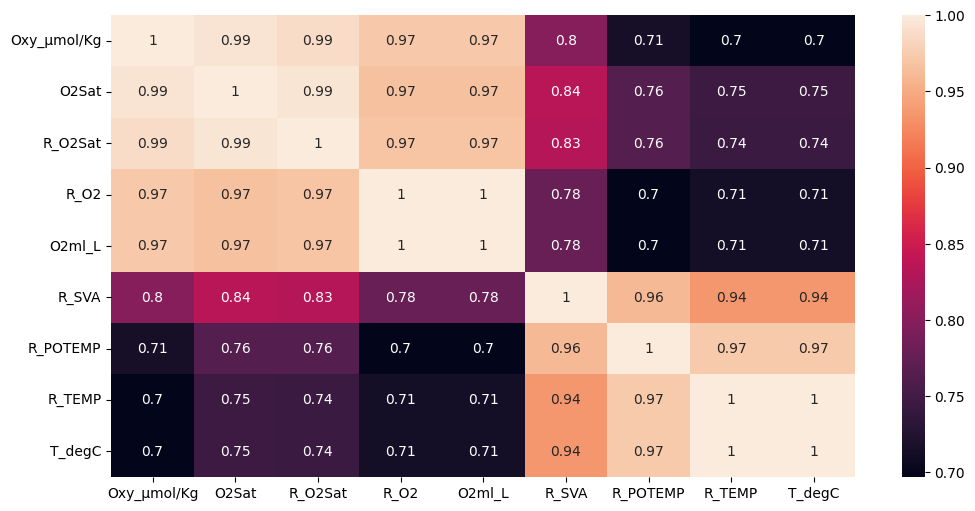

In [28]:
'''
Examine the variables, their correlations with each other, and their contribution to the final model. 
Train a new linear regression with fewer variables and report how much predictive power your models retain as you shrink the number of variables to 10 or fewer.
'''
import seaborn as sns
# Calculate the correlation matrix
corr = bottle.corr()

# Extract the top correlated columns
# The greater the absolute value, the stronger the correlation.
top = corr.index[abs(corr['T_degC'] > 0.5)]

# Calculate the correlation matrix of the top columns
top_corr = bottle[top].corr()

# Plot the heatmap of the top correlated columns
plt.figure(figsize = (12,6))
sns.heatmap(top_corr, annot = True)
plt.show()

In [29]:
# Train a new linear regression with fewer variables
bottle = bottle.loc[:, ['T_degC', 'Oxy_µmol/Kg', 'O2Sat', 'R_O2Sat','R_O2','O2ml_L','R_SVA','R_POTEMP','R_TEMP']]

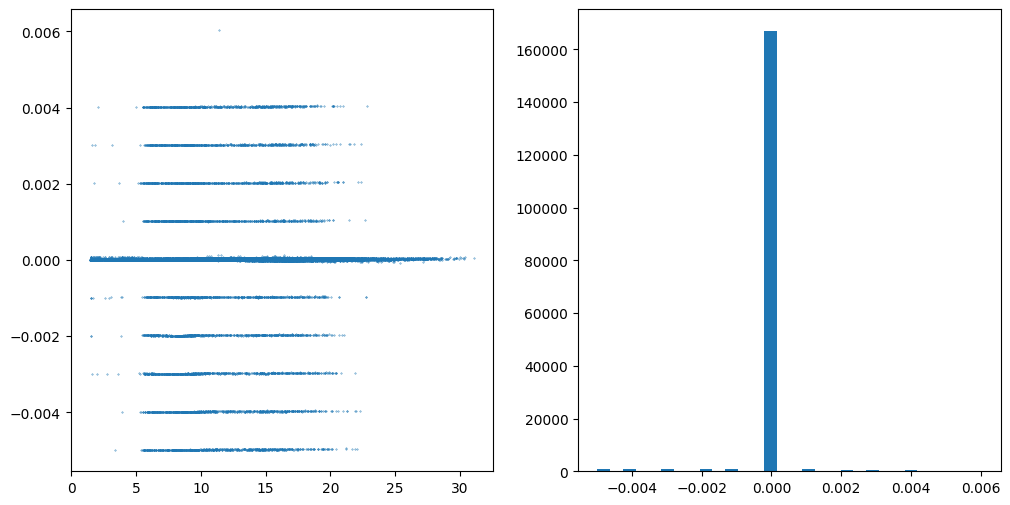

,model,rmse,r2
0,linear-1,0.000575,1.000000
1,ridge-1,0.000575,1.000000
2,ridge-grid-1,0.000575,1.000000
3,lasso-1,0.064654,0.999764
4,lasso-grid-1,0.006712,0.999997
5,linear-new-1,0.000577,1.000000


In [30]:
X = bottle.drop("T_degC" ,axis =1)
y = bottle["T_degC"]

X_train,X_test,y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

linreg_new = LinearRegression()
linreg_new.fit(X_train, y_train)
y_pred = linreg_new.predict(X_test)

evaluate_model("linear-new-1",  y_test, y_pred)


In [ ]:
'''
My insights:

The fact that the RMSE has increased only slightly and the R2 value remains unchanged after removing some variables 
from the linear regression model suggests that the predictive power of the model has not been significantly affected. 
This means that the remaining 10 or fewer variables are likely the most important predictors for the target variable, 
and the model is able to explain the variation in the target variable quite well using these variables.

However, it's important to note that the decrease in the number of variables may have reduced 
the complexity of the model and made it simpler, more interpretable, and less prone to overfitting. 
This may be beneficial in certain situations, such as when the model needs to be deployed in a real-world setting 
where computational resources or data availability are limited.

Overall, while a slight increase in RMSE suggests a small reduction in predictive power, 
the fact that R2 remains the same suggests that the model's ability to explain the variation in the target variable has not been significantly affected.
It's always important to evaluate the model's performance on a hold-out validation set 
or using cross-validation to ensure that the model's performance is consistent across different data subsets.
'''

In [42]:
# Q2
'''
Using the titanic dataset:

Perform data cleaning, including imputation, getting dummies, and dropping columns
Run at least 3 different classifier models to predict survival and report the performance of each
'''
# Read CSV
titanic = pd.read_csv("https://raw.githubusercontent.com/tobypenk/data-bootcamp/main/week%203/titanic.csv", index_col=0)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [44]:
# Impute missing values in 'Age' column with the mean
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [45]:
# Cut age into five groups
titanic["age_binned"]=pd.cut(titanic["Age"],5,labels=['yougest','young adult','adult','older','oldest'])

In [46]:
# Impute missing values in 'Embarked' column with the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [47]:
# Create dummy variables 

to_dummy = ["age_binned", "Embarked", "Sex"]
for dummy in to_dummy: 
    dummies = pd.get_dummies(titanic[dummy],drop_first=True,prefix=dummy)
    titanic=pd.concat([titanic, dummies],axis=1)
    titanic.drop(dummy, axis=1, inplace=True)

titanic

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,age_binned_young adult,age_binned_adult,age_binned_older,age_binned_oldest,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,1,0,0,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,0,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,0,1,0,0,0,1,1
5,6,0,3,"Moran, Mr. James",29.699118,0,0,330877,8.4583,NaN,1,0,0,0,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,E46,0,0,1,0,0,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,NaN,0,0,0,0,0,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,NaN,1,0,0,0,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,237736,30.0708,NaN,0,0,0,0,0,0,0


In [48]:
# Remove unnecessary columns
to_drop=['Name', 'Ticket', 'Cabin']
titanic.drop(to_drop, axis=1, inplace=True)

In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Survived                891 non-null    int64  
 2   Pclass                  891 non-null    int64  
 3   Age                     891 non-null    float64
 4   SibSp                   891 non-null    int64  
 5   Parch                   891 non-null    int64  
 6   Fare                    891 non-null    float64
 7   age_binned_young adult  891 non-null    uint8  
 8   age_binned_adult        891 non-null    uint8  
 9   age_binned_older        891 non-null    uint8  
 10  age_binned_oldest       891 non-null    uint8  
 11  Embarked_Q              891 non-null    uint8  
 12  Embarked_S              891 non-null    uint8  
 13  Sex_male                891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(7)
memory u

In [56]:
# Run at least 3 different classifier models to predict survival and report the performance of each
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

class_tracker = pd.DataFrame({"model":[], "accuracy":[],"precision": [], "recall":[]})

# Define evaluate_classifier function
def evaluate_classifier(model_name, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred,average="weighted")
    recall = recall_score(y_test,y_pred,average="weighted")

    payload = [model_name,acc, precision, recall]
    class_tracker.loc[len(class_tracker.index)] = payload

    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, cmap="Blues", annot=True)
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.show()

    return class_tracker


In [57]:
from sklearn.linear_model import LogisticRegression

X = titanic.drop("Survived" ,axis =1)
y = titanic["Survived"]

X_train,X_test,y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

C:\Users\yq89_\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


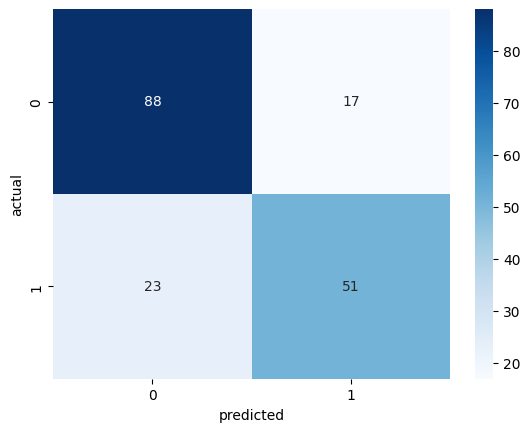

,model,accuracy,precision,recall
0,logistic-1,0.776536,0.775102,0.776536


In [58]:
# Logistic Regression Classifier Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
evaluate_classifier("logistic-1", y_test, y_pred)

In [59]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier Model
dt_class= DecisionTreeClassifier()
dt_class.fit(X_train, y_train)
y_pred = dt_class.predict(X_test)

accuracy_score(y_test, y_pred)

0.7597765363128491

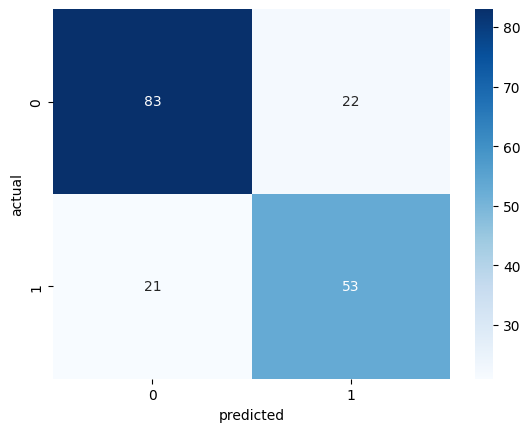

,model,accuracy,precision,recall
0,logistic-1,0.776536,0.775102,0.776536
1,decision-tree-1,0.759777,0.760287,0.759777


In [60]:
evaluate_classifier("decision-tree-1", y_test, y_pred)

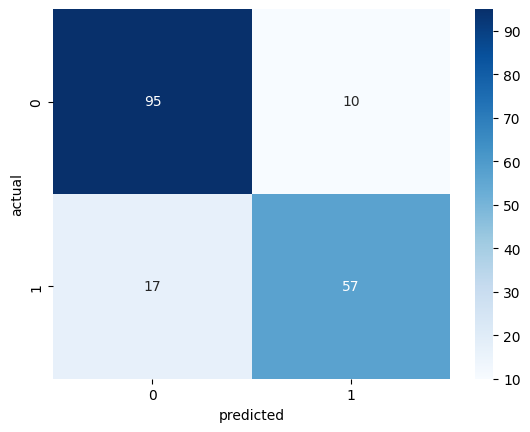

,model,accuracy,precision,recall
0,logistic-1,0.776536,0.775102,0.776536
1,decision-tree-1,0.759777,0.760287,0.759777
2,radom-forest-1,0.849162,0.849261,0.849162


In [61]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier Model
rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train, y_train)
y_pred = rf_class.predict(X_test)
evaluate_classifier("radom-forest-1", y_test, y_pred)

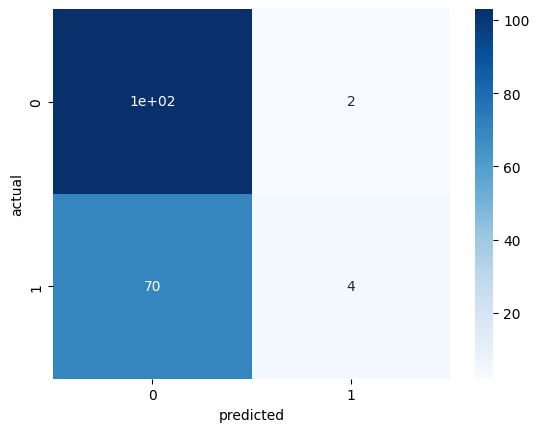

,model,accuracy,precision,recall
0,logistic-1,0.776536,0.775102,0.776536
1,decision-tree-1,0.759777,0.760287,0.759777
2,radom-forest-1,0.849162,0.849261,0.849162
3,svm-1,0.597765,0.624848,0.597765


In [62]:
from sklearn.svm import SVC

# Support Vector Classifier Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
evaluate_classifier("svm-1", y_test, y_pred)

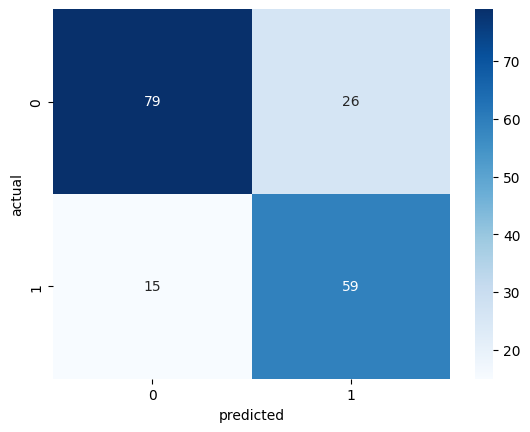

,model,accuracy,precision,recall
0,logistic-1,0.776536,0.775102,0.776536
1,decision-tree-1,0.759777,0.760287,0.759777
2,radom-forest-1,0.849162,0.849261,0.849162
3,svm-1,0.597765,0.624848,0.597765
4,naive-bayes-1,0.770950,0.779941,0.770950


In [63]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes Classifier Model
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train,y_train)
y_pred = bayes_classifier.predict(X_test)
evaluate_classifier("naive-bayes-1",y_test,y_pred)


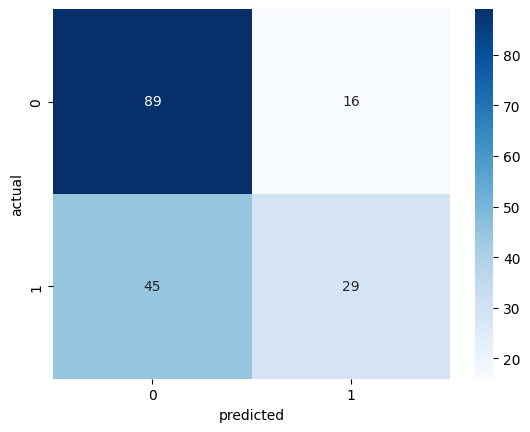

,model,accuracy,precision,recall
0,logistic-1,0.776536,0.775102,0.776536
1,decision-tree-1,0.759777,0.760287,0.759777
2,radom-forest-1,0.849162,0.849261,0.849162
3,svm-1,0.597765,0.624848,0.597765
4,naive-bayes-1,0.770950,0.779941,0.770950
5,knn-1,0.659218,0.656021,0.659218


In [64]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors (KNN) Classifier Model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
evaluate_classifier("knn-1",y_test,y_pred)

In [ ]:
'''
My insights:

Based on the output of class tracker, the "radom-forest" model is the best classifier model for the dataset.
It has the highest accuracy, precision, and recall scores compared to the other models.
'''